# Supervised topic-modeling
## A proof of concept

<br>

### Marco Repetto $^1$ $^2$
#### University of Milano-Bicocca, <br> Milan 22 Apr. 2020

<br>

$^1$ Data scientist @ Siemens Digital Industries <br>
$^2$ PhD candidate in Economics and Statistics @ University Milan-Bicocca <br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-proof-of-concept" data-toc-modified-id="A-proof-of-concept-1">A proof of concept</a></span><ul class="toc-item"><li><span><a href="#Marco-Repetto-$^1$-$^2$" data-toc-modified-id="Marco-Repetto-$^1$-$^2$-1.1">Marco Repetto $^1$ $^2$</a></span><ul class="toc-item"><li><span><a href="#University-of-Milano-Bicocca,--Milan-22-Apr.-2020" data-toc-modified-id="University-of-Milano-Bicocca,--Milan-22-Apr.-2020-1.1.1">University of Milano-Bicocca, <br> Milan 22 Apr. 2020</a></span></li></ul></li></ul></li><li><span><a href="#Required-ingredients" data-toc-modified-id="Required-ingredients-2">Required ingredients</a></span></li><li><span><a href="#The-contribute" data-toc-modified-id="The-contribute-3">The contribute</a></span></li><li><span><a href="#The-notation" data-toc-modified-id="The-notation-4">The notation</a></span></li><li><span><a href="#Model-specification" data-toc-modified-id="Model-specification-5">Model specification</a></span><ul class="toc-item"><li><span><a href="#Model-objective" data-toc-modified-id="Model-objective-5.1">Model objective</a></span></li><li><span><a href="#Step-1:-how-to-estimate-$S$?" data-toc-modified-id="Step-1:-how-to-estimate-$S$?-5.2">Step 1: how to estimate $S$?</a></span></li><li><span><a href="#Step-2:-how-to-estimate-$O$?" data-toc-modified-id="Step-2:-how-to-estimate-$O$?-5.3">Step 2: how to estimate $O$?</a></span></li><li><span><a href="#Step-3:-how-do-we-predict?" data-toc-modified-id="Step-3:-how-do-we-predict?-5.4">Step 3: how do we predict?</a></span></li></ul></li><li><span><a href="#Use-case-Dante" data-toc-modified-id="Use-case-Dante-6">Use case Dante</a></span><ul class="toc-item"><li><span><a href="#Find-out-which-verses-belong-to-Dante's-Inferno" data-toc-modified-id="Find-out-which-verses-belong-to-Dante's-Inferno-6.1">Find out which verses belong to Dante's Inferno</a></span></li><li><span><a href="#The-three-Dantes" data-toc-modified-id="The-three-Dantes-6.2">The three Dantes</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-7">Modelling</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Feature-selection" data-toc-modified-id="Step-1:-Feature-selection-7.1">Step 1: Feature selection</a></span></li><li><span><a href="#Step-2:-Topic-modelling" data-toc-modified-id="Step-2:-Topic-modelling-7.2">Step 2: Topic modelling</a></span></li><li><span><a href="#Step-3:-Scoring-on-webpage" data-toc-modified-id="Step-3:-Scoring-on-webpage-7.3">Step 3: Scoring on webpage</a></span></li><li><span><a href="#Wait-a-minute..." data-toc-modified-id="Wait-a-minute...-7.4">Wait a minute...</a></span></li></ul></li><li><span><a href="#Let's-do-some-parameter-tuning-on-cross-validation" data-toc-modified-id="Let's-do-some-parameter-tuning-on-cross-validation-8">Let's do some parameter tuning on cross-validation</a></span></li><li><span><a href="#A-practical-application" data-toc-modified-id="A-practical-application-9">A practical application</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-10">Objective</a></span></li><li><span><a href="#Data-gathering-process" data-toc-modified-id="Data-gathering-process-11">Data gathering process</a></span></li><li><span><a href="#Exploratory-analysis" data-toc-modified-id="Exploratory-analysis-12">Exploratory analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-keywords-by-customer-and-prospect" data-toc-modified-id="Distribution-of-keywords-by-customer-and-prospect-12.1">Distribution of keywords by customer and prospect</a></span></li><li><span><a href="#A-glimpse-on-the-distribution" data-toc-modified-id="A-glimpse-on-the-distribution-12.2">A glimpse on the distribution</a></span></li><li><span><a href="#Let's-normalize:-stemming" data-toc-modified-id="Let's-normalize:-stemming-12.3">Let's normalize: stemming</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-13">Modelling</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Feature-selection" data-toc-modified-id="Step-1:-Feature-selection-13.1">Step 1: Feature selection</a></span></li><li><span><a href="#Step-2:-Topic-modelling" data-toc-modified-id="Step-2:-Topic-modelling-13.2">Step 2: Topic modelling</a></span></li><li><span><a href="#Step-3:-Scoring-on-webpage" data-toc-modified-id="Step-3:-Scoring-on-webpage-13.3">Step 3: Scoring on webpage</a></span></li></ul></li><li><span><a href="#Applying-the-model" data-toc-modified-id="Applying-the-model-14">Applying the model</a></span><ul class="toc-item"><li><span><a href="#Training-test-split" data-toc-modified-id="Training-test-split-14.1">Training-test split</a></span></li><li><span><a href="#Crossvalidating-parameters" data-toc-modified-id="Crossvalidating-parameters-14.2">Crossvalidating parameters</a></span></li><li><span><a href="#Out-of-sample-model-performance" data-toc-modified-id="Out-of-sample-model-performance-14.3">Out of sample model performance</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-15">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-16">References</a></span></li></ul></div>

## Required ingredients

In [98]:
import beautifultools as bt
import pandas as pd
import wordcloud as wc
import pickle
import qgrid
import os.path

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import scipy

## The contribute
This notebook applies the approach originally stated by <cite data-cite="4251771/LA4VJEQV"></cite> into two very different use cases, namely:

1. Find whether a bunch of text belongs to Dante's Inferno; and
2. Given a series of prospects web-pages find the ones more similar to actual customers.

# The framework
The **source of variation exploited** by the framework is given by the signals contained inside a text corpora.

For example two different authors may have different ways of writing the same piece of text, the aim is capture this signals in a bag-of-words fashion.  

The **commonsense** suggests that this is possible however a rigorous model is required.

## The notation
The notation used in the model formulation is:
* $n$: number of text corpus;
* $m$: number of words;
* $d_i \in \mathbb{R}^m_+$: word counts of the ith corpus;
* $D$: the matrix containing all the corpus array $d$ such that: 

$$D = [d_1,...,d_n]'$$

* $S$: is the set indexing a subset of sentiment charged words such that $D_{.,[S]} \subset D$;
* $y_i$: particular label associated to the i*th* corpus;
* $p_i$: corpus sentiment such that $p_i \in [0,1]$;
* $O_+$ and $O_-$ the distribution of positive and negative sentiment words.

## Model specification
In the model **conditional independence** is assumed between $d_i$ and $y_i$ given $p_i$.

An additional assumption is that **conditional distribution**, namely:

$$\mathbb{P}(\text{sign}(y_i)=1)=g(p_i)$$

where $g(\cdot)$ is required to be **monotonically increasing**.

Last, we assume the dictionary of words $\{1,2,...,m\}$ to be composed as such $S \cup N$ namely that each word can be sentiment changing or sentiment neutral. More importantly $d_{i,[S]}$ and $d_{i,[N]}$ are assumed to be **independent**.

Moreover, is assumed that "sentiment-charged" word counts follow a **mixture multinomial model** as:

$$d_{i,[S]} \sim \text{Multinomial}(s_i, p_i O_+ + (1-p_i) O_-)$$

### Model objective

Objective of the model: learn $O_+$, $O_-$, $p_i$.

The steps:
1. Isolating the set of most relevant sentiment words from all the articles, $S$;
2. Assign term-specific sentiment weights based on their relevance in prediction, estimating the parameters $O_+$, $O_-$; and
3. Estimate the article-level sentiment $p_i$.

### Step 1: how to estimate $S$?
We can use the following regression setting:

$$
\text{sgn}(y_i) = f_j \cdot \text{sgn}(d_{i,j}) + \epsilon_i
 \quad j =  1...m$$

Then for the selection of the sentiment charged words we can identify the following thresholds: $(\alpha_+,\alpha_-,\kappa)$.

The result is therefore: 

$$
\hat{S} = \left\{j: f_j \geq \frac{1}{2} + \alpha_+ \right\} \cup \left\{j: f_j \leq \frac{1}{2} - \alpha_-\right\} \cap \left\{j: \kappa_j \geq \kappa\right\}
$$

### Step 2: how to estimate $O$?
Generally in **topic modeling** is used a **non-supervised** approach because labels are not observable. However in our use cases we **observe labels** making the problem a **supervised** one. 

That gives an advantage in terms of **convergence** to the true sentiment value **<cite data-cite="4251771/JVGVKGPH"></cite>**.

The **two topics modeling** is performed using the following regression setting:

$$
\mathbb{E}\tilde{D}' = OW
$$

Where:
* $\tilde{D}$ is the set of all sentiment charged word frequencies per corpus;
* $O$ is the matrix containing positive an negative words $[O_+, O_-]$;
* $W$ is the matrix containing all the sentiment score for each word.

Since both $\tilde{D}$ and $W$ are not observed we can use **sample estimates**. The **in sample sentiment score** can be set as:

$$\hat{p_i} = \frac{\text{rank of } y_i \text{ in } \{y_l\}^n_{l=1}}{n}$$


### Step 3: how do we predict?
Predicting on new text corpus means finding a $p_i$ for a new corpus fed into the pipeline.

The estimation was carried out using **maximum likelihood estimation** in the following fashion:

$$ \hat{p} = \text{arg} \max_{p\in[0,1]} \left\{ \hat{s}^{-1} \sum^{\hat{s}}_{j=1} d_j \log \left(p\hat{O}_{+,j} + (1-p)\hat{O}_{-,j} \right) + \lambda \log(p(1-p)) \right\}$$

The role of the penalty is to help cope with the **limited number of observations** and the **low signal-to-noise ratio**, basically pushes $\hat{p}$ toward $0.5$

## Use case Dante
### Find out which verses belong to Dante's Inferno

In [99]:
# Get data from Github and store it in a DataFrame
df = bt.testData.dante()

# Visualize it nicely
qgrid.show_grid(df, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [100]:
import importlib
importlib.reload(bt)

<module 'beautifultools' from '/var/home/mrepetto94/Documenti/Google Drive/2.Projects/PhD/ECO repository/IV Term/Reading Groups/Python Programming/sentiment_modelling/beautifultools.py'>

### The three Dantes

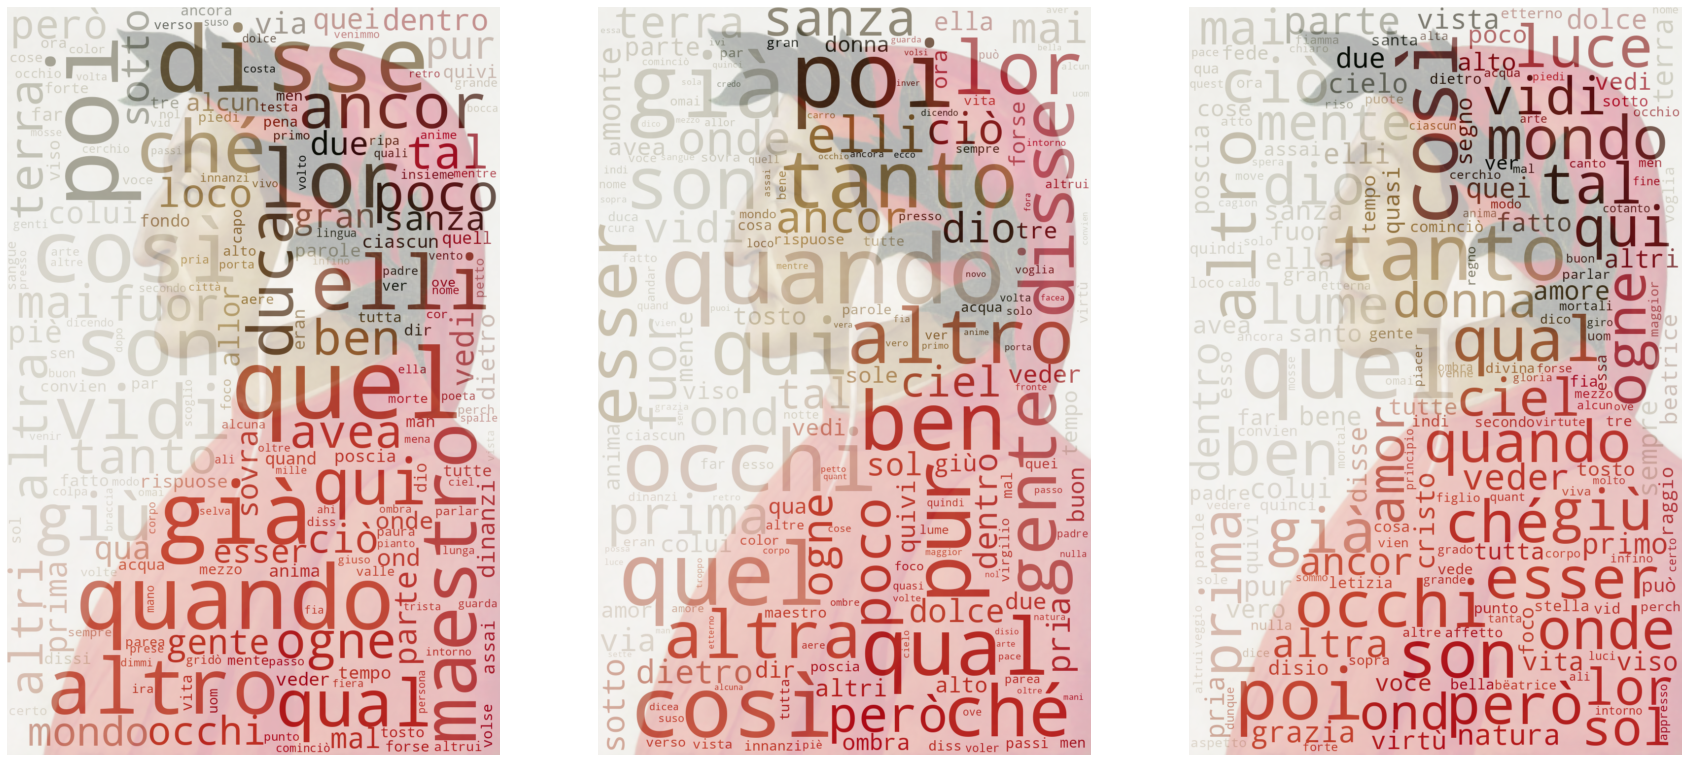

In [101]:
bt.word_cloud([" ".join(df.loc[i]["content"].tolist()) for i in ["inferno", "purgatorio", "paradiso"]], maskPath = "Portrait_de_Dante.jpg", 
              figsize=(30,20))

## Modelling

In [102]:
# No need for multi index here 
df = df.reset_index()

# No need for canto column
df = df.drop(["canto"],axis=1)

# Set inferno = 1, purgatorio and paradiso = 0
df["label"] = (df["label"] == "inferno").apply(lambda x: float(x))

In [103]:
qgrid.show_grid(df, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [108]:
res = bt.SSESTM(alpha_minus=0.5, 
                alpha_plus=0.5,
                kappa=3).fit(X = df["content"], 
                              y = df["label"])

### Step 1: Feature selection

In [109]:
qgrid.show_grid(res.marginal_screening)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Step 2: Topic modelling

In [115]:
topicMatrix = pd.DataFrame({"S": res.marginal_screening["term"], 
                     "Op": res.topic_coefficients[:,0], 
                     "Om": res.topic_coefficients[:,1]})

qgrid.show_grid(topicMatrix)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Step 3: Scoring on webpage

In [116]:
df["pred"] = res.predict(df["content"])
qgrid.show_grid(df, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Wait a minute...
![](meme_test_data.png)

## Let's do some parameter tuning on cross-validation

In [104]:
# Do train and test split
df_train, df_test = train_test_split(df, 
                                     test_size=0.07, 
                                     random_state=1994)

In [39]:
parameters = {"kappa": (2, 4, 8, 16),
              "alpha_plus": (0.5, 0.6, 0.7, 0.8),
              "alpha_minus": (0.5, 0.4, 0.3, 0.2),
              "l" : (0, 1, 5, 10)}

clf = GridSearchCV(bt.SSESTM(), 
                   parameters,
                   n_jobs = 3,
                   scoring= "neg_mean_squared_error", 
                   cv = 5, 
                   iid = True)

clf.fit(X = df_train["content"], y = df_train["label"])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SSESTM(alpha_minus=0.5, alpha_plus=0.5, kappa=1, l=0.0),
             iid=True, n_jobs=3,
             param_grid={'alpha_minus': (0.5, 0.4, 0.3, 0.2),
                         'alpha_plus': (0.5, 0.6, 0.7, 0.8),
                         'kappa': (2, 4, 8, 16), 'l': (0, 1, 5, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
df_test = df_test.copy()
df_test["pred"] = clf.best_estimator_.predict(df_test["content"])

In [41]:
clf.best_estimator_

SSESTM(alpha_minus=0.2, alpha_plus=0.5, kappa=16, l=0)

In [42]:
qgrid.show_grid(df_test)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## A practical application
## Objective
Use the information contained in the home pages of Siemens customers and potential ones to train an algorithm that outputs a sentiment $p = [0,1]$ on new potential prospects home pages.

## Data gathering process

In [ ]:
# Save/load the file based on its existence
if os.path.isfile("data/webpageTokens.pickle"):
    print("Loading file")
    with open("data/webpageTokens.pickle", "rb") as fp:  # UnPickling
        df = pickle.load(fp)

else:
    # Parse data from spreadsheets
    prospect = pd.read_excel("output/Prospect_Ranking_NoCompetitor.xlsx")

    client = pd.read_excel("data/Master TEMPLATE_DF-PD_2019_8_MARCO.xlsx",
                           sheet_name="Master Template")

    # Evaluate 2018-2017-2016 mean orders
    client["Orders Mean"] = client[[
        "Orders 18 DF_PD (cubo vs P.IVA) ",
        "Orders 17 DF_PD (cubo vs P.IVA)",
        "Orders 16 DF_PD (cubo vs P.IVA)",
    ]].mean(axis=1)
    # Reject rows if mean is 0 or below 0
    client = client[client["Orders Mean"] > 0]

    col1 = [0 for i in range(0, len(prospect["Sito Web"]))]
    col2 = list(prospect["Sito Web"])
    col3 = [0 for i in range(0, len(prospect["Sito Web"]))]

    col1.extend([1 for i in range(0, len(client["Sito Web"]))])
    col2.extend(list(client["Sito Web"]))
    col3.extend(list(client["Orders Mean"]))

    # Construct the dataframe and drop the NAs (no webpage exists)
    df = pd.DataFrame(({
        "Client": col1,
        "WebPage": col2,
        "Keywords": "",
        "Orders": col3
    }))
    df = df.dropna()

    # Check whether url exists and then get the data from the HTML file
    df = df.copy()
    df.loc[:, ("WebPage")] = df["WebPage"].apply(bt.urlize_string,
                                                 warning=False,
                                                 verify=False)
    df = df.dropna()
    df.loc[:, ("Keywords")] = df["WebPage"].apply(bt.webpage_text_tokenizer,
                                                  body=False,
                                                  verify=False)

    print("Saving file")
    with open("data/webpageTokens.pickle", "wb") as fp:  # Pickling
        pickle.dump(df, fp)

In [ ]:
# Get rid of duplicated keywords
df.loc[:, ("Keywords")] = df["Keywords"].apply(bt.drop_duplicates)

# Get rid of gone or forbidden pages
df = df[df.loc[:, ("Keywords")] != "gone"]
df = df[df.loc[:, ("Keywords")] != "forbidden"]
df = df[df.loc[:, ("Keywords")] != "home"]

In [ ]:
df = df[df["Keywords"].apply(len) > 60]

In [ ]:
# A glimpse
qgrid.show_grid(df.head(10))

## Exploratory analysis 
### Distribution of keywords by customer and prospect

In [ ]:
clientKeywords = " ".join(df["Keywords"][df["Client"] == 1].tolist())
prospectKeywords = " ".join(df["Keywords"][df["Client"] == 0].tolist())

In [ ]:
# Clients wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(clientKeywords).to_image()

In [ ]:
# Prospect wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(prospectKeywords).to_image()

### A glimpse on the distribution

In [ ]:
bt.plot_word_frequencies(prospectKeywords, title="Prospect word freq")

In [ ]:
bt.plot_word_frequencies(clientKeywords, title="Client word freq")

### Let's normalize: stemming

In [ ]:
keywordsNoStem = " ".join(df["Keywords"].tolist())
keywordsNoStem = bt.drop_duplicates(keywordsNoStem).split(" ")
len(keywordsNoStem)

In [ ]:
keywordsStem = " ".join(df["Keywords"].tolist())
keywordsStem = bt.stem_words(keywordsStem)
keywordsStem = bt.drop_duplicates(keywordsStem).split(" ")
len(keywordsStem)

In [ ]:
df["Keywords"] = df["Keywords"].apply(bt.stem_words)

## Modelling

In [ ]:
import importlib
importlib.reload(bt)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     test_size=0.20, 
                                     random_state=42)

res = bt.SSESTM(alpha_minus=0.5, 
                alpha_plus=0.5,
                kappa=3).fit(X = df_train["Keywords"], 
                              y = df_train["Orders"])

### Step 1: Feature selection

In [ ]:
qgrid.show_grid(res.marginal_screening)

In [ ]:
res.marginal_screening.shape

### Step 2: Topic modelling

In [ ]:
test = pd.DataFrame({"S": res.marginal_screening["term"], 
                     "Op": res.topic_coefficients[:,0], 
                     "Om": res.topic_coefficients[:,1]})
qgrid.show_grid(test)

### Step 3: Scoring on webpage

In [ ]:
pred = res.predict(df_test["Keywords"])
pred

## Applying the model

### Training-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.30, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"kappa": (4, 16, 32),
              "alpha_plus": (0.5, 0.6, 0.7),
              "alpha_plus": (0.5, 0.4, 0.3),
              "l" : (0,10,100)}

clf = GridSearchCV(bt.SSESTM(), parameters, scoring= "neg_mean_squared_error", cv = 5, iid = True)
clf.fit(X = df_train["Keywords"], y = df_train["Orders"])

In [ ]:
df_test = df_test.copy()
df_test["Pred"] = clf.best_estimator_.predict(df_test["Keywords"])

In [ ]:
qgrid.show_grid(df_test)

### Crossvalidating parameters

### Out of sample model performance 

## Conclusion

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression(fit_intercept=True,normalize=False,copy_X=True).get_params()

## References
<div class="cite2c-biblio"></div>